This notebook shows how to run the ssm-jax demos from inside a notebook.

In [5]:
try:
    import optax
except ModuleNotFoundError:
    %pip install optax
    import optax


try:
    import tensorflow_probability as tfp
except ModuleNotFoundError:
    %pip install -qq tensorflow-probability
    import tensorflow_probability as tfp

try:
    import distrax
except ModuleNotFoundError:
    %pip install distrax
    import distrax

In [6]:
try:
    import ssm_jax
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/ssm-jax.git
    import ssm_jax

In [7]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [8]:
import jax.numpy as jnp
import jax.random as jr
from jax import jit, value_and_grad

# LG-SSM

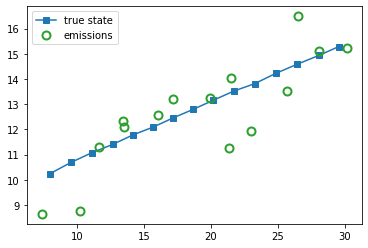

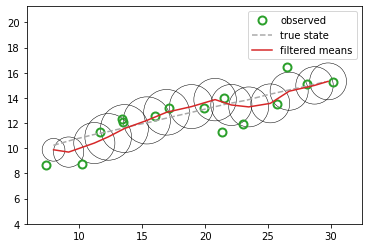

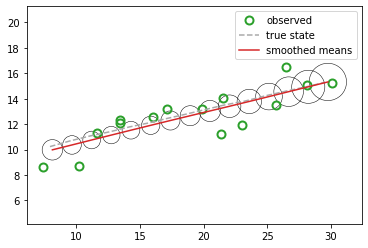

In [15]:
# Here we run the demo end-to-end

import ssm_jax.lgssm.demos.kf_tracking as demo

demo.main()

kalman_tracking_truth.pdf
kalman_tracking_filtered.pdf
kalman_tracking_smoothed.pdf


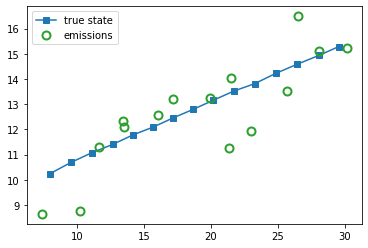

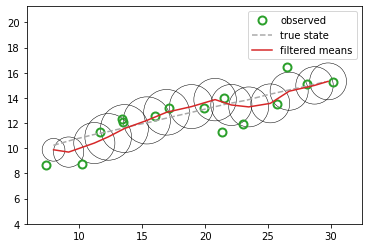

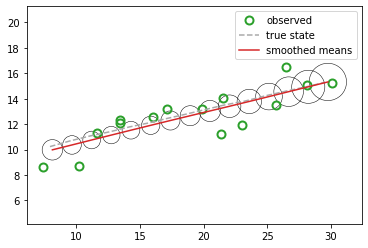

In [25]:
# Here we show how to create all the figures and save them

from ssm_jax.lgssm.demos.kf_tracking import kf_tracking, plot_kf_tracking

x, y, lgssm_posterior = kf_tracking()
dict_figures = plot_kf_tracking(x, y, lgssm_posterior)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

spiral_data.pdf
spiral_filtered.pdf
spiral_smoothed.pdf


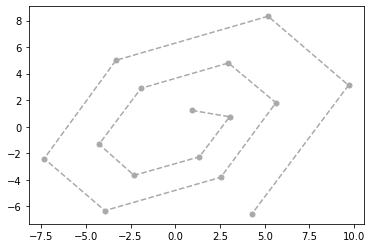

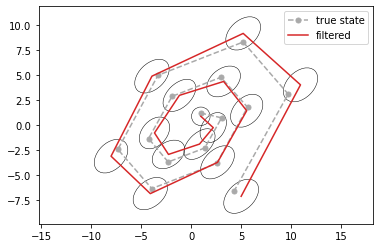

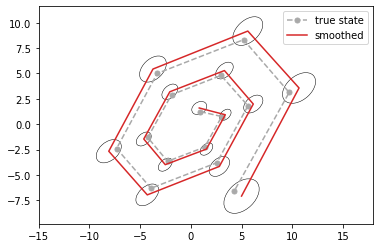

In [24]:
# Here we show how to create all the figures and save them

from ssm_jax.lgssm.demos.kf_spiral import kf_spiral, plot_kf_spiral

x, y, lgssm_posterior = kf_spiral()
dict_figures = plot_kf_spiral(x, y, lgssm_posterior)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

missiles_latent.pdf
missiles_filtered.pdf
missiles_smoothed.pdf


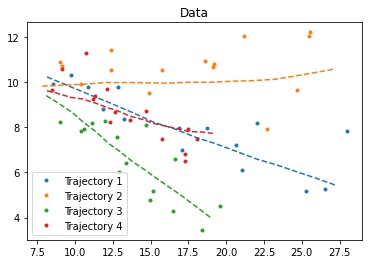

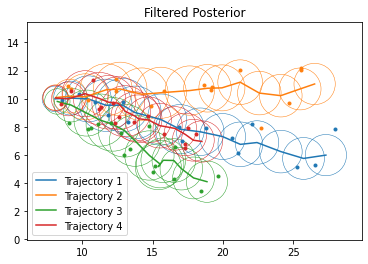

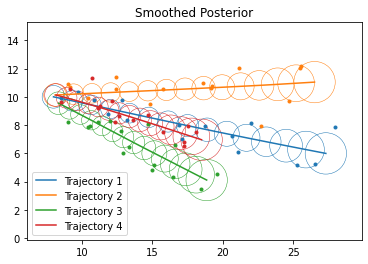

In [26]:
# Here we show how to create all the figures and save them

from ssm_jax.lgssm.demos.kf_parallel import kf_parallel, plot_kf_parallel

x, y, lgssm_posterior = kf_parallel()
dict_figures = plot_kf_parallel(x, y, lgssm_posterior)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

# HMM

Printing sample observed/latent...
obs:  111111111122221111111111111111111111222222222122221111111111
hid:  135553452655336631635155152623211211346222126326426542234464
Log likelihood:  -523.9222
most likely states: 111111111111111111111111111111111111111111111111111111111111
hmm_casino_filter.pdf
hmm_casino_smooth.pdf
hmm_casino_map.pdf


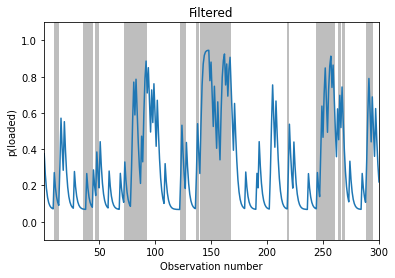

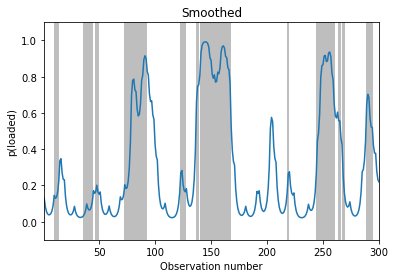

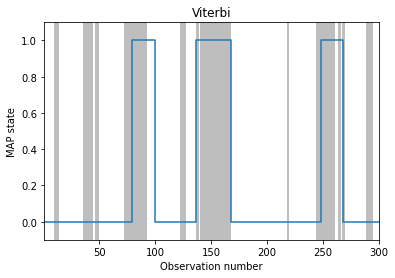

In [28]:
from ssm_jax.hmm.demos.casino_hmm import make_model_and_data, plot_results

hmm, true_states, emissions = make_model_and_data()
posterior = hmm.smoother(emissions)
most_likely_states = hmm.most_likely_states(emissions)
dict_figures = plot_results(true_states, emissions, posterior, most_likely_states)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

log joint prob:     3149.1013
log marginal prob:  3149.1047
hmm_gauss_2d_emissions.pdf
hmm_gauss_2d_trace.pdf


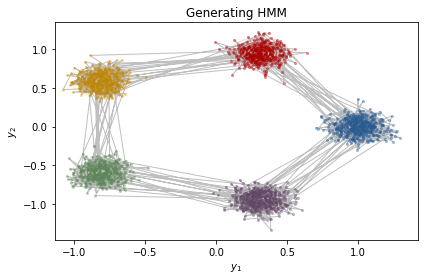

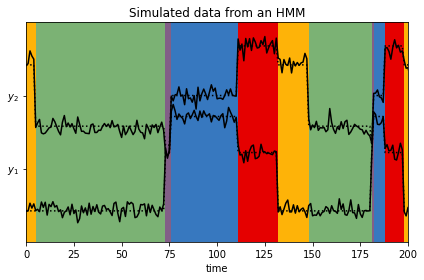

In [31]:
from ssm_jax.hmm.demos.gaussian_hmm_2d import make_hmm, plot_results

num_timesteps = 2000
plot_timesteps = 200
true_hmm = make_hmm()
true_states, emissions = true_hmm.sample(jr.PRNGKey(0), num_timesteps)
dict_figures = plot_results(true_hmm, emissions, true_states, plot_timesteps)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)